# Learning how to use pydeck to map routes 
- Ideally, I'll be able to animate buses moving 

------
## Path Layer Example
But first, let's learn how to visualize lines. 
[Source](https://deckgl.readthedocs.io/en/latest/gallery/path_layer.html)

In [14]:
import geopandas as gpd
import pandas as pd
import pydeck as pdk

In [10]:
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/bart-lines.json"
df = pd.read_json(DATA_URL)
df

name    color  \
0            Richmond - Millbrae  #ed1c24   
1             Fremont - Richmond  #faa61a   
2      Pittsburg/Bay Point - SFO  #ffe800   
3  Dublin/Pleasanton - Daly City  #00aeef   
4            Fremont - Daly City  #4db848   

                                                path  
0  [[-122.3535851, 37.9360513], [-122.3179784, 37...  
1  [[-122.353165, 37.936887], [-122.317269, 37.92...  
2  [[-121.945154, 38.018914], [-122.024597, 38.00...  
3  [[-121.900367, 37.701695], [-121.928099, 37.69...  
4  [[-121.9764, 37.557355], [-122.017867, 37.5912...

In [11]:
def hex_to_rgb(h):
    h = h.lstrip("#")
    return tuple(int(h[i : i + 2], 16) for i in (0, 2, 4))


df["color"] = df["color"].apply(hex_to_rgb)


view_state = pdk.ViewState(latitude=37.782556, longitude=-122.3484867, zoom=10)


In [12]:

layer = pdk.Layer(
    type="PathLayer",
    data=df,
    pickable=True,
    get_color="color",
    width_scale=20,
    width_min_pixels=2,
    get_path="path",
    get_width=5,
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}"})
r.to_html("path_layer.html")

----
## Stack overflow example
- https://stackoverflow.com/questions/75035018/proper-syntax-for-a-pydeck-pathlayer-from-a-shapely-geometry

In [60]:
consline=gpd.read_file("https://github.com/deanm0000/SOexamples/raw/main/consline.gpkg")
consline



geometry
0  MULTILINESTRING ((-103.77722 25.91355, -102.47...

In [1]:
consline_multilinestring = consline.geometry[0]
# [list(geom.coords) for geom in consline_multilinestring.geoms]

NameError: name 'consline' is not defined

In [58]:
mylayers=[
    pdk.Layer(
        'PathLayer',
        data=[list(geom.coords) for geom in consline_multilinestring.geoms],
        get_path="-",
        pickable=True,
        get_fill_color=[0,255,0],
        width_scale=20,
        width_min_pixels=2,   
    )
]

view_state = pdk.ViewState(
    longitude=-98.99,
    latitude=31.79,
    zoom=5,
    min_zoom=1,
    max_zoom=15)
r = pdk.Deck(layers=mylayers, initial_view_state=view_state, map_style='light')
r.to_html("example.html")

-----
## Let's try to visualize bus routes

In [ ]:
- https://deckgl.readthedocs.io/en/latest/layer.html
- https://stackoverflow.com/questions/75035018/proper-syntax-for-a-pydeck-pathlayer-from-a-shapely-geometry

In [75]:
# Bus Stops!
geo_bus_stops = gpd.read_file("geodata/CTA_Bus_Stops.geojson")


In [63]:
import fsspec
path = "geodata/CTA_BusRoutes__2_.zip"
with fsspec.open(path) as file:
    geo_bus_routes = gpd.read_file(file)

geo_bus_routes["color"] = "#c60c30"

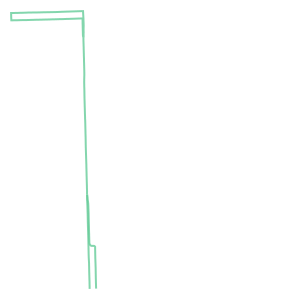

In [89]:
route1_geoseries = geo_bus_routes.geometry[2]
route1_geoseries

In [95]:
linestring_list = [list(geom.coords) for geom in route1_geoseries.geoms]


(array('d', [1177767.2981556766, 1177762.5245431773, 1177758.0524392612, 1177750.8247634247, 1177738.9143541753, 1177734.4419221766, 1177729.3074180111, 1177716.5699106753, 1177710.065330509, 1177706.376361508, 1177702.6273532584, 1177698.366535008, 1177693.4429884255, 1177693.021401342, 1177688.6700320914, 1177684.3186628446, 1177676.579833176, 1177672.8911922611, 1177658.0162220076, 1177645.625826843, 1177640.6123854257, 1177622.4716736749, 1177612.7915749252, 1177599.424147591, 1177606.0622576773]),
 array('d', [1881817.344989024, 1882065.1118819416, 1882276.4392151907, 1882491.3879322708, 1882943.1718056053, 1883154.4991388544, 1883445.993634604, 1883668.1857755259, 1883795.679286942, 1883912.264027521, 1884036.1361551061, 1884221.9556653574, 1884487.9429942742, 1884538.9586402774, 1884735.710215278, 1884932.461790271, 1885209.358218111, 1885325.9429586902, 1885806.8563669398, 1886316.9445856065, 1886593.8636511937, 1887140.3468101919, 1887322.4780076072, 1887621.1936175227, 188780

In [96]:
# Center map at Chicago 
view_chicago = pdk.ViewState(
    latitude = 41.8781, longitude = -87.6298, zoom = 12)

my_layers = [
    pdk.Layer(
        type = "GeoJsonLayer", 
        id = "bus_routes", 
        data = geo_bus_routes, 
        pickable = True, 
        get_fill_color = [180, 0, 200, 140], 
    ), 
    # Bus routes
    # pdk.Layer(
    #     type = "PathLayer", 
    #     data = [list(geom.coords) for geom in route1_geoseries.geoms], 
    #     get_path = "-", 
    #     pickable = True,
    #     get_fill_color=[0,255,0], # RGB color 
    #     width_scale=20,
    #     width_min_pixels=2,   
    # ), 
    # Bus Stops 
    # pdk.Layer(
    #     type = "ScatterplotLayer", 
    #     data = geo_bus_stops, 
    #     pickable = True, 
    #     get_position = "geometry.coordinates", 
    #     get_fill_color = [255, 0, 0],
    #     radius_scale = 15
    # )
]

chi = pdk.Deck(layers = my_layers, 
         initial_view_state = view_chicago, map_style='light', 
        #  tooltip = {"text": "{name}"}
         )

chi.to_html("example.html")